#imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

#data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#visualize examples

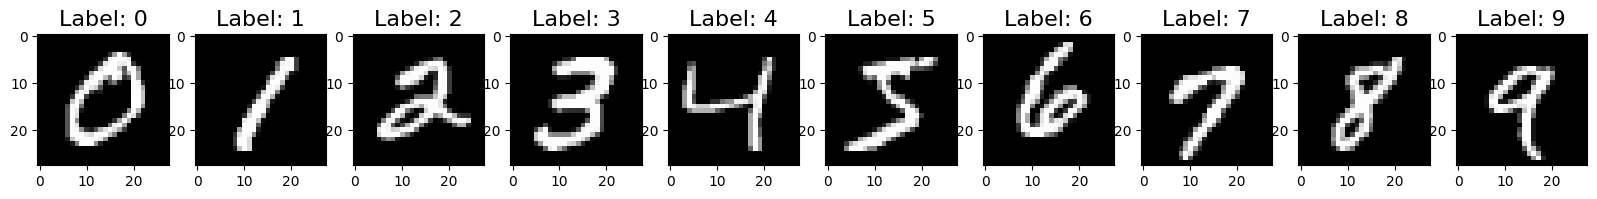

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
for i in range(10):
  print(y_train[i])



5
0
4
1
9
2
1
3
1
4


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:

for i in range(10):
  print(y_train[i])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#prepare data

In [8]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [9]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Create Model - Fully Connected Neural Network

In [10]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#

#train

In [11]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/10
118/118 [==============================] - 2s 11ms/step - loss: 0.5959 - accuracy: 0.8278
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2262 - accuracy: 0.9340
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1617 - accuracy: 0.9522
Epoch 4/10
118/118 [==============================] - 1s 13ms/step - loss: 0.1261 - accuracy: 0.9632
Epoch 5/10
118/118 [==============================] - 2s 18ms/step - loss: 0.1036 - accuracy: 0.9690
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0870 - accuracy: 0.9742
Epoch 7/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0744 - accuracy: 0.9780
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 9/10
118/118 [==============================] - 2s 18ms/step - loss: 0.0562 - accuracy: 0.9831
Epoch 10/10
118/118 [==============================] - 2s 21ms/step - loss: 0.0491 - accura

#evaluate

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.0689 - accuracy: 0.9782
Test Loss: 0.06887805461883545, Test Accuracy: 0.9782000184059143


In [13]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)


313/313 [==============================] - 1s 2ms/step
[[1.3616926e-07 9.0025218e-08 2.0189527e-05 ... 9.9984646e-01
  2.0431653e-06 9.0380590e-06]
 [1.0368424e-06 1.2931120e-04 9.9974871e-01 ... 3.1949572e-08
  3.9876241e-07 5.5784972e-09]
 [4.7301050e-06 9.9689698e-01 7.5424745e-05 ... 1.4648496e-03
  1.1374463e-03 3.1549302e-05]
 ...
 [9.4531896e-11 2.7835620e-09 2.6108168e-10 ... 3.4066852e-07
  5.1061500e-07 5.6388321e-06]
 [8.3931679e-09 2.2653516e-08 2.1178774e-11 ... 1.4122630e-09
  3.9204664e-05 8.2691143e-09]
 [5.7005767e-08 1.5278662e-10 1.6768753e-09 ... 1.3137997e-12
  5.2859233e-09 1.2271972e-10]]
[7 2 1 ... 4 5 6]


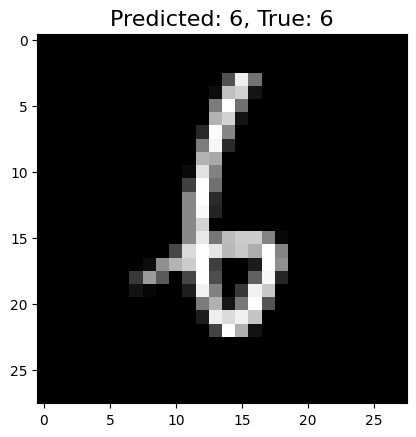

In [14]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

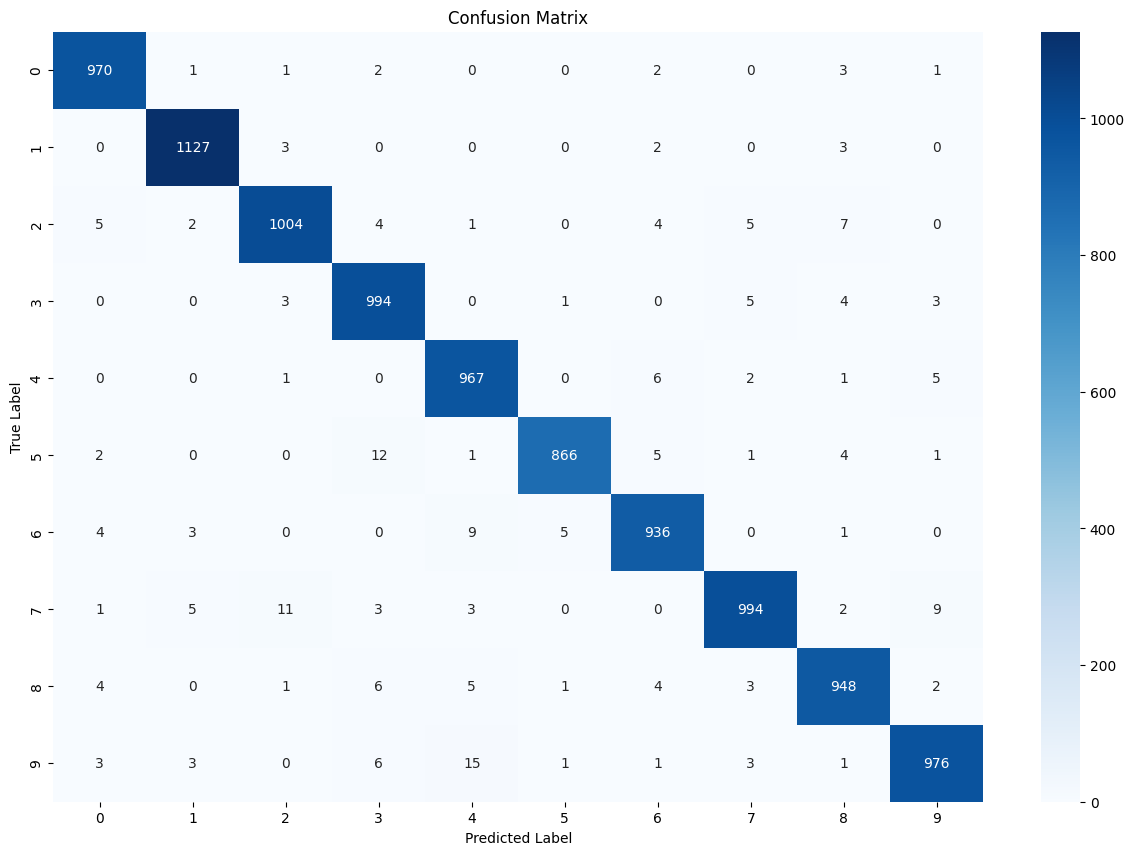

In [15]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#investing error

In [16]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]



In [17]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

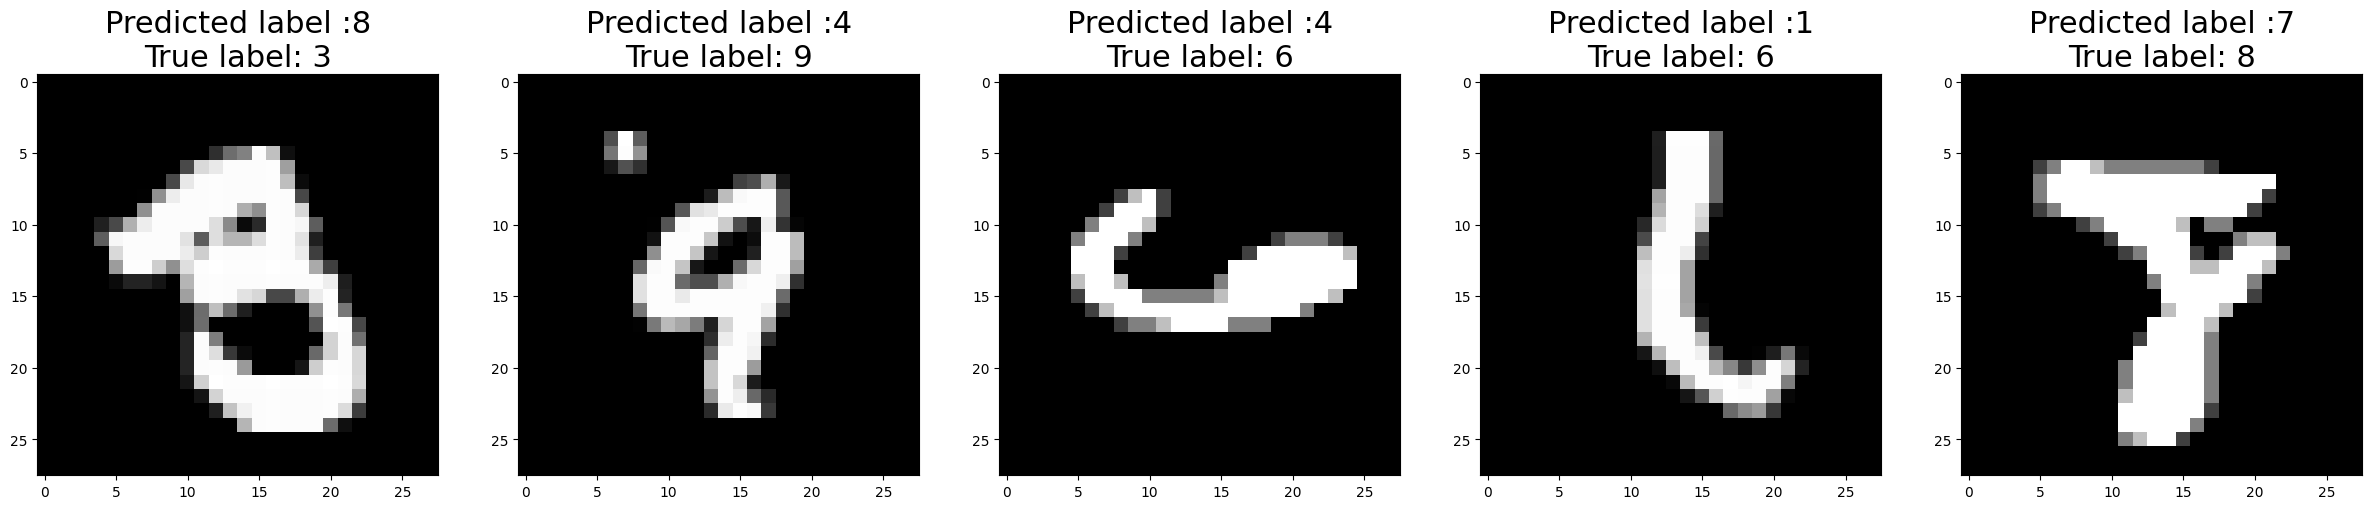

In [18]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
